# Importation des Packages Nécessaire

In [1]:
import cv2
import os
import pathlib
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#le chemin vers dataset
dataset_path = r'C:\Users\Samad\Desktop\ProjetDL\dataset_tiyni'
# dataset_path = '/content/date-fruit-image-dataset-in-controlled-environment'


In [4]:
#la création d'objet de chemin d'accès au fichier dataset
dataset = pathlib.Path(dataset_path)

In [5]:
#le chemin d'accée à chaque datasete de chaque types des dattes
def directory_dataset(dataset):
  folders = []
  for i in dataset.iterdir():
    if i.is_dir():
      folders.append(i)
  return folders   

In [6]:
folders = directory_dataset(dataset)

In [7]:
#le nombre de tout les images de dataset
def number_of_images_in_dataset(dataset):
  images = list(dataset.glob("*/*.*"))
  return len(images)
print("number of all images in dataset: {}".format(number_of_images_in_dataset(dataset)))

number of all images in dataset: 1658


In [8]:
#le nombre des images pour chaque type des dattes
def number_of_images_in_each_folder(folders):
  for i in folders:
    str_ = "{}: {}".format(i, len(list(pathlib.Path(i).glob("*.*"))))
    print(str_)
number_of_images_in_each_folder(folders)

/content/date-fruit-image-dataset-in-controlled-environment/Nabtat Ali: 177
/content/date-fruit-image-dataset-in-controlled-environment/Galaxy: 190
/content/date-fruit-image-dataset-in-controlled-environment/Meneifi: 232
/content/date-fruit-image-dataset-in-controlled-environment/Medjool: 135
/content/date-fruit-image-dataset-in-controlled-environment/Ajwa: 175
/content/date-fruit-image-dataset-in-controlled-environment/Sugaey: 168
/content/date-fruit-image-dataset-in-controlled-environment/Shaishe: 171
/content/date-fruit-image-dataset-in-controlled-environment/Sokari: 264
/content/date-fruit-image-dataset-in-controlled-environment/Rutab: 146


/content/date-fruit-image-dataset-in-controlled-environment/Nabtat Ali/Nabtat Ali Date (117).JPG


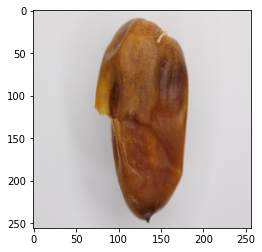

/content/date-fruit-image-dataset-in-controlled-environment/Galaxy/Galaxy Date (182).JPG


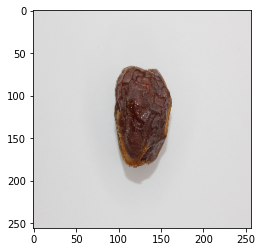

/content/date-fruit-image-dataset-in-controlled-environment/Meneifi/Meneifi Date (31).JPG


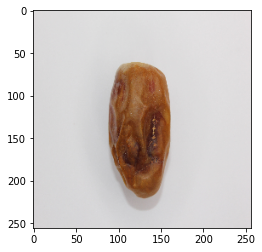

/content/date-fruit-image-dataset-in-controlled-environment/Medjool/Medjool Date (79).JPG


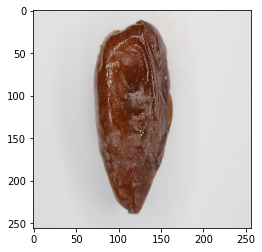

/content/date-fruit-image-dataset-in-controlled-environment/Ajwa/Ajwa Date (111).JPG


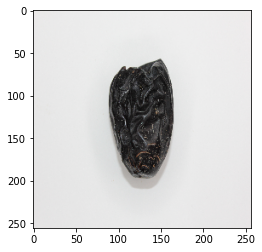

/content/date-fruit-image-dataset-in-controlled-environment/Sugaey/Sugaey Date (112).JPG


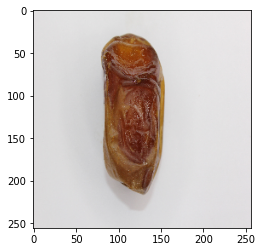

/content/date-fruit-image-dataset-in-controlled-environment/Shaishe/Shaishe Date (3).JPG


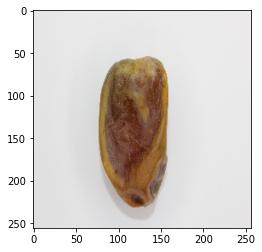

/content/date-fruit-image-dataset-in-controlled-environment/Sokari/Sokari Date (138).JPG


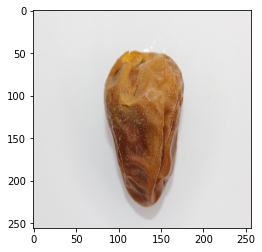

/content/date-fruit-image-dataset-in-controlled-environment/Rutab/Rutab Date (115).JPG


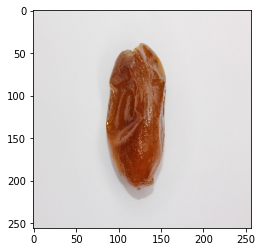

In [9]:
img_height= 256
img_width = 256

def show_single_image_in_each_directory(folders):
  for i in folders:
    images = list(pathlib.Path(i).glob("*.*"))
    print(images[0])
    img = cv2.imread(os.path.join(images[0]))
    img = cv2.resize(img, (img_width, img_height))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
show_single_image_in_each_directory(folders)    

In [10]:
#les classes 
classe_tiyni = ['Ajwa','Medjool','Nabtat Ali','Rutab', 'Sokari']

In [11]:
img_width = 256
img_height = 256
data = []

for category in classe_tiyni :
    folder = os.path.join(dataset_path, category)
    #pour les lebels
    label = classe_tiyni.index(category)
    for img in os.listdir(folder):
        #le chemin d'accès à les images 
        img_path = os.path.join(folder, img)
        #lire l'image à partir du chemin d'accès utilisant imread de opencv
        imag_array = cv2.imread(img_path)
        #la redimmention des images utilisant cv2.resize
        imag_array = cv2.resize(imag_array, (img_width, img_height))
        #meter chaque image de dataset avec leur label dans la liste data
        data.append([imag_array, label])

In [12]:
#le nomber totales des images de dataset :
print("le nomber totales des images de dataset :", len(data))

le nomber totales des images de dataset : 897


In [13]:
import random
#Maintenant on vas mélanger les images de data puisque il sont trier par order des classe
random.shuffle(data)

# Séparation des donnees (images) el les labels dans deux listes X et y

In [14]:
X = []
y = []

for features, label in data :
    X.append(features)
    y.append(label)

In [15]:
X = np.array(X)
y = np.array(y)

# Train test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Preprocessing: scale images

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Build convolutional neural network and train it

In [18]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
import tensorflow as tf

# Architecture de modèle

In [22]:
model = keras.models.Sequential()

#la première couche de convolution
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2))) #pooling layer 1
# model.add(layers.Dropout(0.2)) # Dropout

#la deuxième couche de convolution
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) #pooling layer 2
# model.add(layers.Dropout(0.2)) # Dropout

#la troisième couche de convolution
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) #pooling layer 3
# model.add(layers.Dropout(0.2)) # Dropout

#Flatten
model.add(layers.Flatten())
#fully connected
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [24]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(X_train_scaled, y_train,validation_data=(X_test_scaled,y_test), epochs=30)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


21/21 [==============================] - 14s 124ms/step - loss: 2.2372 - accuracy: 0.3229 - val_loss: 1.4285 - val_accuracy: 0.4756
Epoch 2/50
21/21 [==============================] - 1s 58ms/step - loss: 1.0845 - accuracy: 0.5804 - val_loss: 0.7800 - val_accuracy: 0.7867
Epoch 3/50
21/21 [==============================] - 1s 48ms/step - loss: 0.5887 - accuracy: 0.7917 - val_loss: 0.4037 - val_accuracy: 0.8978
Epoch 4/50
21/21 [==============================] - 1s 45ms/step - loss: 0.3135 - accuracy: 0.8943 - val_loss: 0.2599 - val_accuracy: 0.9067
Epoch 5/50
21/21 [==============================] - 1s 45ms/step - loss: 0.3461 - accuracy: 0.8661 - val_loss: 0.2740 - val_accuracy: 0.8800
Epoch 6/50
21/21 [==============================] - 1s 46ms/step - loss: 0.2016 - accuracy: 0.9360 - val_loss: 0.1896 - val_accuracy: 0.9111
Epoch 7/50
21/21 [==============================] - 1s 46ms/step - loss: 0.2421 - accuracy: 0.9092 - val_loss: 0.3213 - val_accuracy: 0.8756
Epoch 8/50
21/21 [====

Ici, nous voyons que la précision du train est très élevée (100%)!!, danc pour évter le surapprentissage on va utiliser l'augmentation des données et on vas ajuter une couche drop out layer.

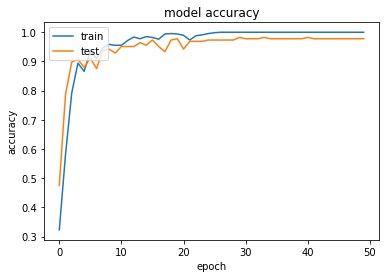

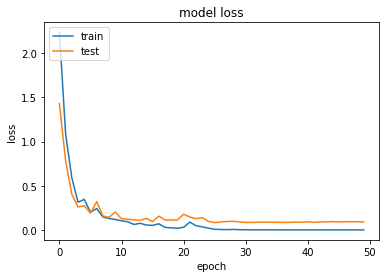

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Improve Test Accuracy Using Data Augmentation

In [19]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images through any degree between 0 and 360
        zoom_range = 0.09,  
        width_shift_range=0.08, # a float number, that would indicate the percentage of width or height of the image to shift. 
        height_shift_range=0.08,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
X_batch, y_batch = datagen.flow(X_train, y_train, batch_size=672).next()

In [ ]:
print(X_batch.shape)

(672, 448, 448, 3)


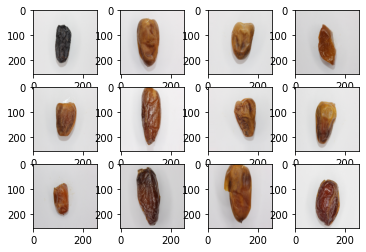

In [28]:
#data augmentation images
for i in range(12):
  plt.subplot(3, 4, i+1)
  batch = X_batch
  image_ = batch[i].astype(np.uint8)
  image_=cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)
  plt.imshow(image_)
plt.show()

In [20]:
X_train=np.concatenate((X_train,X_batch)) # Adding the newly formed data via augmentation to X,y train and test
y_train=np.concatenate((y_train,y_batch))

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Train the model using data augmentation and a drop out layer

In [22]:
model = keras.models.Sequential()

# model.add(data_augmentation)

#la première couche de convolution
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2))) #pooling layer 1

#la deuxième couche de convolution
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) #pooling layer 2
# model.add(layers.Dropout(0.2))



#la troisième couche de convolution
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) #pooling layer 3

#droupout
model.add(layers.Dropout(0.2))

#Flatten
model.add(layers.Flatten())
#fully connected
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [23]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(X_train_scaled, y_train,validation_data=(X_test_scaled,y_test) ,epochs=30) 


Epoch 1/30


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


42/42 [==============================] - 14s 79ms/step - loss: 1.4571 - accuracy: 0.4993 - val_loss: 0.4205 - val_accuracy: 0.8533
Epoch 2/30
42/42 [==============================] - 3s 62ms/step - loss: 0.3809 - accuracy: 0.8564 - val_loss: 0.2456 - val_accuracy: 0.9200
Epoch 3/30
42/42 [==============================] - 3s 64ms/step - loss: 0.2879 - accuracy: 0.8973 - val_loss: 0.1965 - val_accuracy: 0.9333
Epoch 4/30
42/42 [==============================] - 3s 61ms/step - loss: 0.2093 - accuracy: 0.9219 - val_loss: 0.1885 - val_accuracy: 0.9422
Epoch 5/30
42/42 [==============================] - 2s 58ms/step - loss: 0.2338 - accuracy: 0.9122 - val_loss: 0.1248 - val_accuracy: 0.9600
Epoch 6/30
42/42 [==============================] - 2s 59ms/step - loss: 0.1361 - accuracy: 0.9531 - val_loss: 0.1254 - val_accuracy: 0.9600
Epoch 7/30
42/42 [==============================] - 3s 60ms/step - loss: 0.0996 - accuracy: 0.9695 - val_loss: 0.1091 - val_accuracy: 0.9600
Epoch 8/30
42/42 [=====

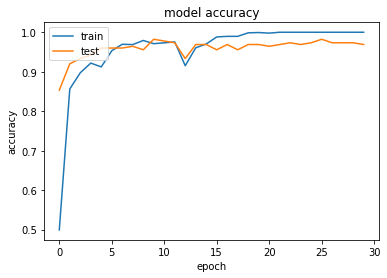

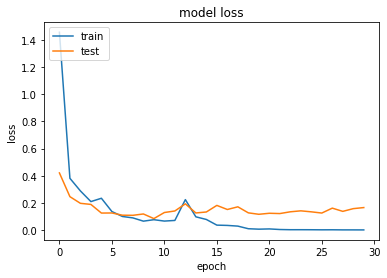

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# la phase de test 

In [34]:
model.evaluate(X_test_scaled,y_test)

8/8 [==============================] - 0s 20ms/step - loss: 0.0556 - accuracy: 0.9867


[0.05560342222452164, 0.9866666793823242]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


8/8 [==============================] - 0s 18ms/step


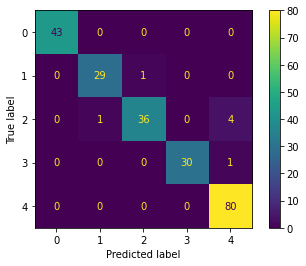

In [25]:
from sklearn.metrics import plot_confusion_matrix
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, classe_tiyni)
plot_confusion_matrix(estimator=classifier, X=X_test_scaled, y_true=y_test)